In [1]:
%matplotlib inline
import sys
from scipy.constants import c,pi
import numpy as np
from math import factorial
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
from scipy.constants import c

In [2]:
def betas_transf(lamda, lamda_c, betas):
    c_norm = c  # Speed of light [m/ps] 
    wc = 2*pi * c_norm / lamda
    w0 = 2*pi * c_norm / lamda_c
    betap = np.zeros_like(betas)
    for i in range(1):
        for j in range(len(betas.T)):
            if j ==0:
                betap[i,j] = betas[i,j]
            fac = 0
            for k in range(j, len(betas.T)):
                #print(j,k, factorial(fac), betas[i, k], (wc - w0)**(fac))
                betap[i, j] += factorial(fac)**(-1) * \
                    betas[i, k] * (wc - w0)**(fac)
                fac += 1
    return betap[0]


def domega(omegap,omega0,beta,gama, P0):
    omega = omegap - omega0
    a = beta[4]/12 #$+ omega * beta[5]/12
    b = beta[2]#+ omega*beta[3] +omega**2 * beta[4]/2 + omega**3 * beta[5]/6
    c = 2 * gama * P0
    
    det = b**2 - 4 * a * c
    if det >= 0:
        Omega = (-b + det**0.5)/(2*a)
        
        if Omega <0:
            Omega = (-b - det**0.5)/(2*a)
        if Omega <0:
            print("No real solution!")
            sys.exit("No real solution!")
        else:
            #print(Omega)
            return Omega**0.5
    else:
        print(' No real sollution in the det', det)
        sys.exit(' No real sollution in the det', det)

    return 1

def dlamda_sig(Omega,lamdap):
    return Omega * lamdap**2 / (2* pi* c - Omega * lamdap)*1e9

def dlamda_idl(Omega,lamdap):
    return Omega * lamdap**2 / (-2* pi* c - Omega * lamdap)*1e9

In [3]:

def plot(sols):
    N = 2**15
    lamdap_const = sols
    lamdaps = np.linspace(1046e-9,1054e-9,N)
    lamdaps = np.ndarray.tolist(lamdaps)
    lami = []
    lams = []
    for lamdap in lamdaps:
        betas = betas_transf(lamdap,lamda0,betas_or)
        Omega  = domega(2*pi *c /lamdap,2*pi *c /lamda0,betas,10*1e-3,15)
        dlamda_s = dlamda_sig(Omega,lamdap)
        dlamda_i = dlamda_idl(Omega,lamdap)
        lami.append(lamdap*1e9 + dlamda_i)
        lams.append(lamdap*1e9 + dlamda_s)
    lamdaps = [i*1e9 for i in lamdaps]

    loc = np.argsort(np.abs(np.asanyarray(lamdaps) - lamdap_const*1e9))[0] # location of the lamda0

    plt.plot(lamdaps,lami, label='idler')
    plt.plot(lamdaps,lams, label='signal')
    plt.plot((lamdap_const*1e9,lamdap_const*1e9),(900,1250), label='asked_for_wavelength')
    plt.gca().get_yaxis().get_major_formatter().set_useOffset(False)
    plt.gca().get_xaxis().get_major_formatter().set_useOffset(False)
    plt.ylabel('Parametric wavelength (nm)')
    plt.ylim([900,1250])
    #plt.legend(loc=1)
    plt.xlabel('Pump wavelength (nm)')
    print("The asked for pump wavelength ", lamdap_const*1e9,"nm results in hits of:",lami[loc] ,"nm idler and:",lams[loc],"nm signal.",)
    plt.show()
    return lamdap_const*1e9, lami[loc], lams[loc]


In [4]:
def find_dlami(lamp,lamisol, lamda0, betas):
    betas = betas_transf(lamp,lamda0,betas_or)
    Omega  = domega(2*pi *c /lamp,2*pi *c /lamda0,betas,10e-3,7)
    dlamda_i = dlamda_idl(Omega,lamp)
    dlamda_s = dlamda_sig(Omega,lamp)
    lami = lamp*1e9 + dlamda_i
    lams = lamp*1e9 + dlamda_s
    return lami - lamisol*1e9

In [5]:
beta0 = 0
beta1 = 0
beta2 = 0
beta3 = 6.756e-2 *(1e-12)**3*1e-3
beta4 = -1.002e-4 * (1e-12)**4*1e-3
beta5 = 3.671*1e-7*(1e-12)**5*1e-3
betas_or = np.array([[0, 0, 0, 6.756e-2*(1e-12)**3, -1.002e-4*(1e-12)**4, 3.671e-7*(1e-12)**5]])*1e-3
lamda_fast, lamda_slow = 1052.95e-9, 1051.85e-9
lamda0 =  lamda_slow

The asked for pump wavelength  1048.23663975 nm results in hits of: 930.616929026 nm idler and: 1199.8894243 nm signal.


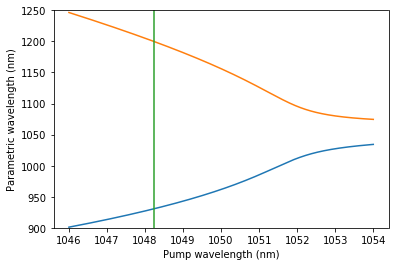

The asked for pump wavelength  1048.91614702 nm results in hits of: 941.469212992 nm idler and: 1184.04770977 nm signal.


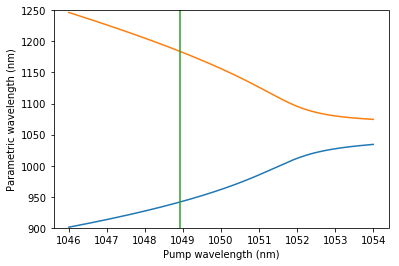

The asked for pump wavelength  1047.45802766 nm results in hits of: 919.419641112 nm idler and: 1216.92740506 nm signal.


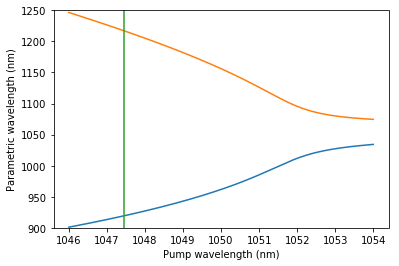

The asked for pump wavelength  1047.85428265 nm results in hits of: 924.973725078 nm idler and: 1208.38546609 nm signal.


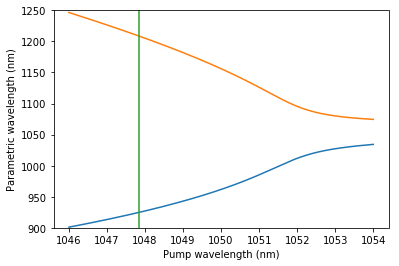

The asked for pump wavelength  1048.26268709 nm results in hits of: 931.01369694 nm idler and: 1199.29885894 nm signal.


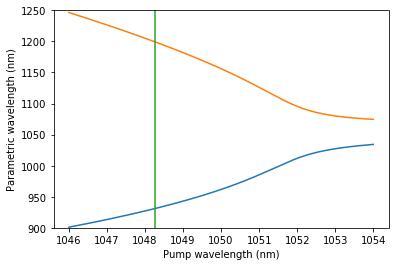

The asked for pump wavelength  1048.82793483 nm results in hits of: 939.994131477 nm idler and: 1186.16365466 nm signal.


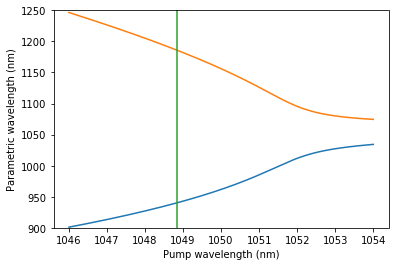

The asked for pump wavelength  1048.17107345 nm results in hits of: 929.62601089 nm idler and: 1201.36820373 nm signal.


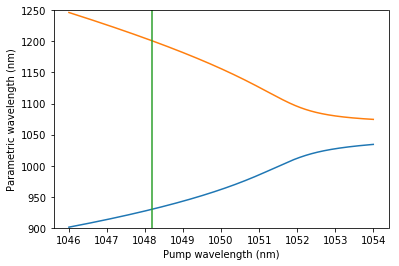

The asked for pump wavelength  1048.79822211 nm results in hits of: 939.50051767 nm idler and: 1186.87430311 nm signal.


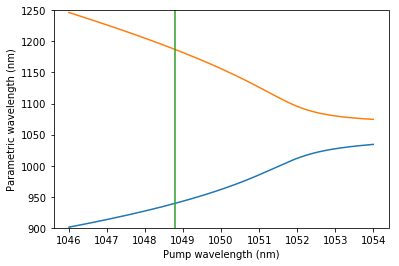

In [20]:

pump_tot = []
lams_tot = ()
lami_search_vec = [931, 942,919.7,925.3,931.4,940.5,930,940]
#lami_search_vec = [907.071587257, 914.682221613, 917.462384898, 926.920155732, 932.870539474, 944.603966761]
for i, lami_search in enumerate(lami_search_vec):
    sol = fsolve(find_dlami,1050e-9, args = (lami_search*1e-9,lamda0, betas_or))[0]
    pump_tot.append(sol)

    find_dlami(sol,931e-9, lamda0, betas_or)
    ccc = plot(pump_tot[i])[2]
    lams_tot += (ccc,)
#c = plot(sol)[2]
pump_tot = [i * 1e9 for i in pump_tot]

In [21]:
for i in range(len(lams_tot)):
    print(lams_tot[i], pump_tot[i], lami_search_vec[i])


1199.8894243 1048.23663975 931
1184.04770977 1048.91614702 942
1216.92740506 1047.45802766 919.7
1208.38546609 1047.85428265 925.3
1199.29885894 1048.26268709 931.4
1186.16365466 1048.82793483 940.5
1201.36820373 1048.17107345 930
1186.87430311 1048.79822211 940


In [8]:
pump_tot

[1046.4876866560087,
 1047.0853336307125,
 1047.2939045217745,
 1047.9650992000004,
 1048.357568916841,
 1049.0660027178185]

In [9]:
lam_p_del = [1047.0, 1047.6, 1047.8, 1048.5, 1048.9, 1049.6]

In [10]:
[pump_tot[i] - lam_p_del[i] for i in range(len(pump_tot))]

[-0.51231334399130901,
 -0.51466636928739717,
 -0.50609547822546119,
 -0.53490079999960471,
 -0.54243108315904465,
 -0.53399728218141718]

# Finding L1, L2
The attenuation of the system in units of decibels is relates to the transmitence T as:

$$
\alpha_{tot} = -10 \log\left(T\right)
$$
.

Since the splices for PCF is considered to be high two different types of splice losses are assumed. The first $l_1$ is considered the splice loss for the PCF and the second $l_2$ descibes the rest of the losses within the system. 

The total loss in units of dB within our system is found to be:

$$
\alpha_{tot}\left(\lambda\right) = 2 l_{1} + k l_{2} + l_{fibre} - \sum^{N}_{i = 1}10 \log\left(WDM^{(i)}_{p^{(i)}}\left(\lambda\right)\right)
$$
, where $p{(i)}$ is the port that light light is to travel. 


Within the test case $1.4 dB$ loss was quoted within the cavity for a wavelength of $1205nm$ with $1dB$ being given to the loss of the fibre and the PCF losses. 

Since the fibre loss along the length of the fibre is quoted as $a_{L} \cdot L = 0.021dB$ the splice loss can be calculated as

$$
2 \cdot l_{1} + a_{L} \cdot L = 1 \Rightarrow l_{1} = \frac{1 -  a_{L} \cdot L}{2} =  \frac{1 -   0.021}{2} = 0.4895 dB.
$$

Within the cavity the signal is high at the wavelength of: 

Furthermore from this one can consider the second splice loss by taking the loss of the wdm 1, 2 for the signal as:
* port2 of WDM1
* port2 of WDM2

again as above but now with the ring (2 small splices) and the WDM losses with respect to the signal ports. 
The equation to be solved is then:
$$
T(1200) = WDM^{(1)}_{p2}\left(1200 \right) + WDM^{(2)}_{p2}\left(1200 \right) - 2 l_{1} - 3 l_{2} - l_{fibre}
$$


Hence the loss of the second splice can be found by:
$$
l_{2} =  \frac{T(1200) - WDM^{(1)}_{p2}\left(1200 \right) - WDM^{(2)}_{p2}\left(1200 \right) + 2 l_{1} + l_{fibre}}{3}
$$

/home/john/miniconda3/lib/python3.5/site-packages/matplotlib/__init__.py:1401: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)
/home/john/miniconda3/lib/python3.5/site-packages/matplotlib/__init__.py:1401: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


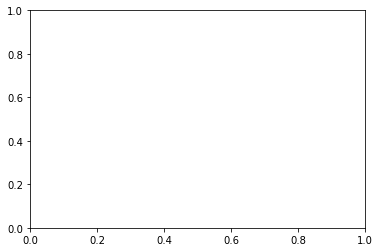

In [11]:
from functions import *
lv = np.linspace(900, 1250, 512)
fv = c/lv
WDM1 = WDM(1050, 1200,fv,c)
WDM2 = WDM(930, 1200, fv,c)
WDM3 = WDM(930, 1050,fv,c)
WDM4 = WDM(930, 1200,fv,c)

In [12]:
def dB(x):
    if x< 1e-16:
        return 0
    return 10*np.log10(x)

In [13]:
def l2_f(lamda, T, l1):
    num = dB(1/T)  - 2 *l1 - 0.021 + dB(WDM1.il_port2(lamda)) +  dB(WDM2.il_port2(lamda))
    return num/3

In [17]:
l1 = 0.4895
l2 = l2_f(1200, 0.72, l1)
print('the splice loss of the small loss ones is:', l2, 'dB')

the splice loss of the small loss ones is: 0.142225011896 dB


In [18]:


def db(x):
    return 10*np.log10(x)

def wdm_losses(l):
    return db(WDM1.il_port2(l)) + db(WDM2.il_port2(l))# + db(WDM3.il_port1(l)) + db(WDM3.il_port1(l))
    

def total_loss(l, l1,l2):
    return  -2*l1 + -3*l2 + wdm_losses(l) - 0.021

def totalT(l,l1, l2):
    return 10**(total_loss(l,l1,l2)/10)

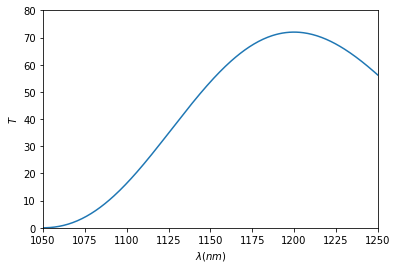

In [19]:

#fig = plt.figure(figsize=(20.0, 10.0))
plt.gca().get_yaxis().get_major_formatter().set_useOffset(False)
plt.plot(lv, 100*totalT(lv,l1, l2))
plt.xlabel(r'$\lambda(nm)$')
plt.xlim(1050, 1250)
plt.ylim(0,80)
plt.ylabel(r'$T$')

plt.show()